In [1]:
from sagemaker import get_execution_role
role = get_execution_role()

# Getting data

In [2]:
import pandas as pd

In [3]:
bucket_name = 'flutz-bucket'
folder = 'spotify'
file_name = 'world_data.csv'

data_location = f's3://{bucket_name}/{folder}/{file_name}'
df=pd.read_csv(data_location)
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
1,1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
2,2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,93,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.4250,180.051,189323,4
3,3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,5
4,4,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.5760,0.000000,0.2100,0.0916,101.993,206459,4


In [4]:
# Dropping non-numerical columns for scaling
df.drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id'], axis=1, inplace=True)
df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
1,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
2,93,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.4250,180.051,189323,4
3,97,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,5
4,98,0.505,0.340,4,-9.005,1,0.0438,0.5760,0.000000,0.2100,0.0916,101.993,206459,4


# Scaling data

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df))

In [7]:
df_scaled.columns=df.columns
df_scaled.index=df.index

In [8]:
df_scaled

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.99,0.708461,0.761995,0.000000,0.909744,1.0,0.041535,0.192771,0.002445,0.065236,0.560284,0.549731,0.137567,0.8
1,0.98,0.609582,0.426988,0.636364,0.794669,0.0,0.033333,0.054819,0.000006,0.194764,0.061297,0.350189,0.110713,0.8
2,0.93,0.483180,0.630993,0.454545,0.857592,0.0,0.360673,0.068976,0.000000,0.113089,0.430598,0.824541,0.119947,0.8
3,0.97,0.633028,0.600992,0.545455,0.863448,0.0,0.155626,0.052410,0.000000,0.456545,0.463019,0.534587,0.102510,1.0
4,0.98,0.514781,0.339987,0.363636,0.789404,1.0,0.046057,0.578313,0.000000,0.194764,0.092806,0.467076,0.131579,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,0.55,0.742100,0.808996,0.272727,0.862093,1.0,0.457413,0.258032,0.000000,0.373822,0.606890,0.595416,0.149563,0.8
9316,0.52,0.464832,0.511990,0.000000,0.797160,1.0,0.040063,0.008494,0.000000,0.147644,0.096353,0.595663,0.164637,0.8
9317,0.66,0.591233,0.715994,1.000000,0.900328,0.0,0.089590,0.294177,0.000000,0.109948,0.515704,0.512431,0.115718,1.0
9318,0.56,0.583078,0.663993,0.090909,0.866026,1.0,0.064143,0.243976,0.000024,0.039162,0.546099,0.777698,0.094930,0.8


# PCA

In [9]:
from sagemaker import PCA

In [10]:
pca_SM = PCA(role=role,
             train_instance_count=1,
             train_instance_type='ml.c4.xlarge',
             output_path=f's3://{bucket_name}/{folder}/',
             num_components=12)

In [11]:
train_data = df_scaled.values.astype('float32')

In [12]:
pca_SM.fit(pca_SM.record_set(train_data))

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-30 16:19:13 Starting - Starting the training job...
2020-11-30 16:19:18 Starting - Launching requested ML instances......
2020-11-30 16:20:21 Starting - Preparing the instances for training......
2020-11-30 16:21:33 Downloading - Downloading input data...
2020-11-30 16:22:12 Training - Training image download completed. Training in progress.
2020-11-30 16:22:12 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/30/2020 16:22:09 INFO 140687117924160] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_num_gpus': u'auto', u'_log_level': u'info', u'subtract_mean': u'true', u'force_dense': u'true', u'epochs': 1, u'algorithm_mode': u'regular', u'extra_components': u'-1', u'_kvstore': u'dist_sync', u'_num_kv_servers': u'auto'}
[11/30/2020 16:22:09 INFO 140687117924160] Merging with provided configuration from /opt/ml/input

## PCA: Accessing the PCA model artifact

In [13]:
import boto3
import os

In [14]:
job_name = pca_SM.latest_training_job.name
model_key = f"{folder}/{job_name}/output/model.tar.gz"

boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')

0

## PCA: Explained-variance-ratio

In [15]:
!pip install mxnet

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [16]:
import mxnet as mx

In [17]:
pca_model_params = mx.ndarray.load('model_algo-1')

In [18]:
s=pd.DataFrame(pca_model_params['s'].asnumpy())
v=pd.DataFrame(pca_model_params['v'].asnumpy())

In [19]:
s.iloc[3:,:].apply(lambda x: x*x).sum()/s.apply(lambda x: x*x).sum()

0    0.96252
dtype: float32

In [20]:
s_9=s.iloc[3:,:]
v_9=v.iloc[:,3:]
v_9.columns=[0,1,2,3,4,5,6,7,8]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

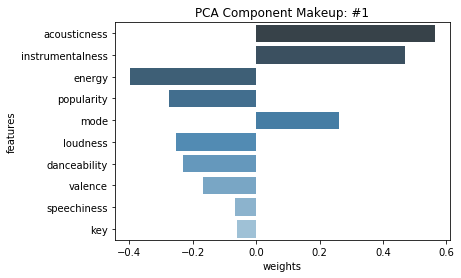

In [22]:
component_num=1

first_comp = v_9[9-component_num]
comps = pd.DataFrame(list(zip(first_comp, df_scaled.columns)), columns=['weights', 'features'])
comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Blues_d")
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

In [23]:
PCA_list=['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7', 'comp_8', 'comp_9']

## PCA: Deploying the PCA model

In [24]:
pca_predictor = pca_SM.deploy(initial_instance_count=1, 
                                 instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


---------------!

In [25]:
result = pca_predictor.predict(train_data)

In [26]:
df_transformed=pd.DataFrame()
for a in result:
    b=a.label['projection'].float32_tensor.values
    df_transformed=df_transformed.append([list(b)])
df_transformed.index=df_scaled.index
df_transformed=df_transformed.iloc[:,3:]
df_transformed.columns=PCA_list

In [27]:
df_transformed.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
0,0.132473,0.006082,-0.153451,0.308210,-0.091347,0.079761,-0.410799,-0.541979,-0.445688
1,0.001121,0.185870,0.078381,0.150662,0.029803,0.598554,0.011100,0.564777,-0.547315
2,-0.073654,-0.304075,-0.086786,0.111560,-0.063259,0.228108,-0.146993,0.491505,-0.690274
3,-0.255887,0.086772,-0.120839,0.133256,-0.087351,0.212880,-0.057849,0.493332,-0.735740
4,-0.046988,0.045347,-0.134823,0.367207,0.229279,0.487374,-0.054413,-0.334098,0.071524


# K-means clustering

In [28]:
from sagemaker import KMeans

In [29]:
train_data = df_transformed.values.astype('float32')

In [30]:
num_clusters = 12
kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.c4.xlarge',
                output_path=f's3://{bucket_name}/{folder}/',              
                k=num_clusters)

In [31]:
kmeans.fit(kmeans.record_set(train_data))

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-30 16:30:51 Starting - Starting the training job...
2020-11-30 16:30:53 Starting - Launching requested ML instances......
2020-11-30 16:32:16 Starting - Preparing the instances for training.........
2020-11-30 16:33:38 Downloading - Downloading input data...
2020-11-30 16:34:21 Training - Training image download completed. Training in progress.
2020-11-30 16:34:21 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/30/2020 16:34:19 INFO 140684768892736] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_ll

In [32]:
kmeans_predictor = kmeans.deploy(initial_instance_count=1, 
                                 instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-----------------!

In [33]:
result = kmeans_predictor.predict(train_data)

In [34]:
cluster_labels = [r.label['closest_cluster'].float32_tensor.values[0] for r in result]

In [35]:
pd.DataFrame(cluster_labels)[0].value_counts()

9.0     1402
2.0     1118
0.0     1001
8.0      988
1.0      947
3.0      917
7.0      723
5.0      610
10.0     535
4.0      499
6.0      402
11.0     178
Name: 0, dtype: int64

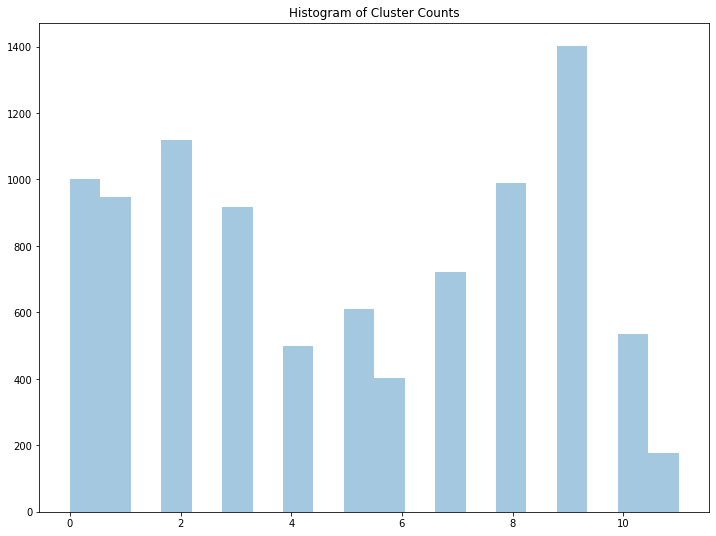

In [36]:
ax=plt.subplots(figsize=(12,9))
ax=sns.distplot(cluster_labels, kde=False)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

# Conclusions

In [37]:
job_name = kmeans.latest_training_job.name
model_key = f"{folder}/{job_name}/output/model.tar.gz"

boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')

0

In [38]:
Kmeans_model_params = mx.ndarray.load('model_algo-1')

In [39]:
cluster_centroids=pd.DataFrame(Kmeans_model_params[0].asnumpy())
cluster_centroids.columns=df_transformed.columns

In [40]:
cluster_centroids

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
0,-0.009056,0.013391,-0.034516,-0.006250,-0.089331,-0.132928,0.292931,-0.415255,-0.379435
1,0.008027,-0.014508,0.047565,-0.122987,-0.170218,-0.198775,0.013426,-0.060761,1.082761
2,-0.001804,0.006389,0.034623,-0.009409,-0.031595,-0.019929,0.204179,0.559139,-0.617747
3,0.012377,-0.010663,0.040509,-0.023613,-0.022588,0.210986,0.262055,-0.378980,-0.259553
4,0.001230,-0.000322,-0.014491,0.022793,-0.217202,0.031407,-0.129198,0.887378,0.739713
5,-0.042796,0.021158,-0.085734,0.137521,0.218671,-0.050370,-0.170346,-0.371396,0.092101
6,0.001820,-0.022406,-0.048370,0.128705,0.217149,0.015702,-0.137496,0.610270,-0.198089
7,0.014619,-0.007928,-0.016973,-0.042303,0.440704,0.007292,0.169274,-0.198888,0.549581
8,0.002019,0.001805,-0.015946,-0.059329,-0.019053,0.005749,-0.327958,0.464747,-0.617490
9,0.012068,-0.008765,0.037687,-0.016030,-0.042437,0.029711,-0.308966,-0.502204,-0.326289


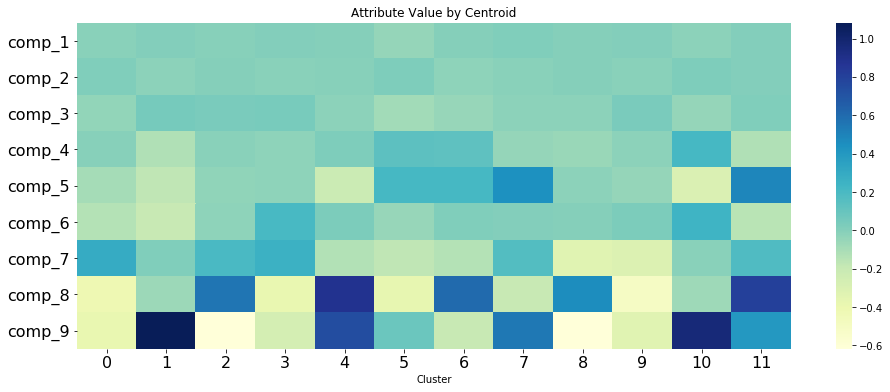

In [41]:
plt.figure(figsize = (16, 6))
ax = sns.heatmap(cluster_centroids.T, cmap = 'YlGnBu')
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")
plt.show()

In [42]:
df_transformed['labels']=list(map(int, cluster_labels))
df_transformed.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,labels
0,0.132473,0.006082,-0.153451,0.308210,-0.091347,0.079761,-0.410799,-0.541979,-0.445688,9
1,0.001121,0.185870,0.078381,0.150662,0.029803,0.598554,0.011100,0.564777,-0.547315,2
2,-0.073654,-0.304075,-0.086786,0.111560,-0.063259,0.228108,-0.146993,0.491505,-0.690274,8
3,-0.255887,0.086772,-0.120839,0.133256,-0.087351,0.212880,-0.057849,0.493332,-0.735740,8
4,-0.046988,0.045347,-0.134823,0.367207,0.229279,0.487374,-0.054413,-0.334098,0.071524,5


In [45]:
cluster=df_transformed[df_transformed['labels']==1]
cluster.head(5)

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,labels
1182,-0.002883,-0.064864,0.200149,-0.156955,-0.174063,-0.120382,-0.129200,-0.130280,0.905994,1
2390,0.059480,-0.045106,-0.013552,-0.045745,-0.297107,-0.222940,0.059140,-0.083843,0.938993,1
2391,0.112997,0.114626,-0.117737,-0.234269,-0.160715,0.238717,-0.408244,-0.081984,1.229059,1
2392,0.041389,0.078394,-0.024572,-0.204382,-0.060294,0.250918,-0.047424,-0.032089,1.194439,1
2393,-0.317347,0.314165,-0.325355,-0.346793,-0.171231,0.118355,-0.406682,-0.147270,1.009633,1


In [ ]:
# sagemaker.Session().delete_endpoint(pca_predictor.endpoint)

In [ ]:
# sagemaker.Session().delete_endpoint(kmeans_predictor.endpoint)